In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


In [3]:
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler ,FunctionTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.model_selection import train_test_split ,GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/FCALC')
import fcalc

Mounted at /content/drive


***Data Set Name:
Dry Bean Dataset***

Abstract: Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.


Relevant Information:

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.


***Attribute Information:***

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.

2.) Perimeter (P): Bean circumference is defined as the length of its border.

3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5.) Aspect ratio (K): Defines the relationship between L and l.

6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12.)Compactness (CO): Measures the roundness of an object: Ed/L

13.)ShapeFactor1 (SF1)

14.)ShapeFactor2 (SF2)

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

DATASET: https://www.muratkoklu.com/datasets/
https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

In [5]:
dataf=pd.read_excel("/content/drive/MyDrive/dry+bean+dataset/DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [6]:
dataf.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [7]:
dataf.shape

(13611, 17)

In [8]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
dataf.nunique()

Area               12011
Perimeter          13416
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [10]:
dataf.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [11]:
dataf.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
dataf['Class'].value_counts()


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [ ]:
dataf['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

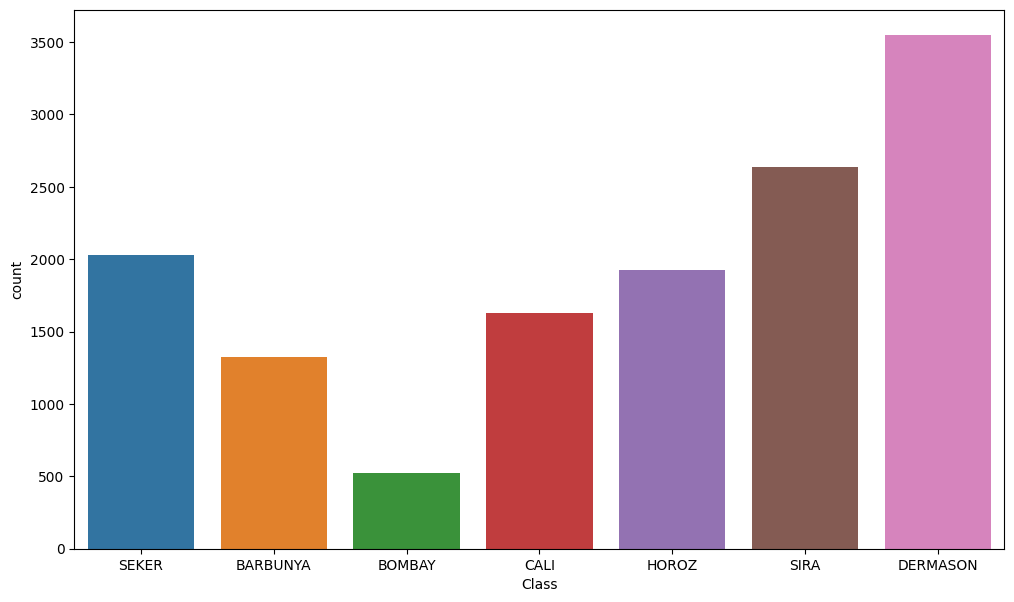

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=dataf)
plt.show()

In [12]:

labelencoder = LabelEncoder()
dataf["Class"] = labelencoder.fit_transform(dataf['Class'])

dataf.tail(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13601,42042,771.515,288.082674,186.347090,1.545947,0.762615,42476,231.364511,0.816254,0.989782,0.887574,0.803118,0.006852,0.001758,0.644999,0.997134,3
13602,42047,768.936,292.975007,183.139141,1.599740,0.780543,42446,231.378269,0.773890,0.990600,0.893644,0.789754,0.006968,0.001672,0.623712,0.997777,3
13603,42049,770.185,290.163403,185.051685,1.568013,0.770243,42503,231.383771,0.756005,0.989318,0.890790,0.797426,0.006901,0.001721,0.635888,0.997080,3
13604,42070,763.489,289.022373,186.123434,1.552853,0.765046,42556,231.441543,0.768823,0.988580,0.906936,0.800774,0.006870,0.001743,0.641239,0.995750,3
13605,42070,760.701,276.691651,193.945366,1.426647,0.713216,42458,231.441543,0.730813,0.990862,0.913596,0.836460,0.006577,0.001986,0.699666,0.998176,3
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,3


Text(0.5, 1.0, 'Correlation Heatmap')

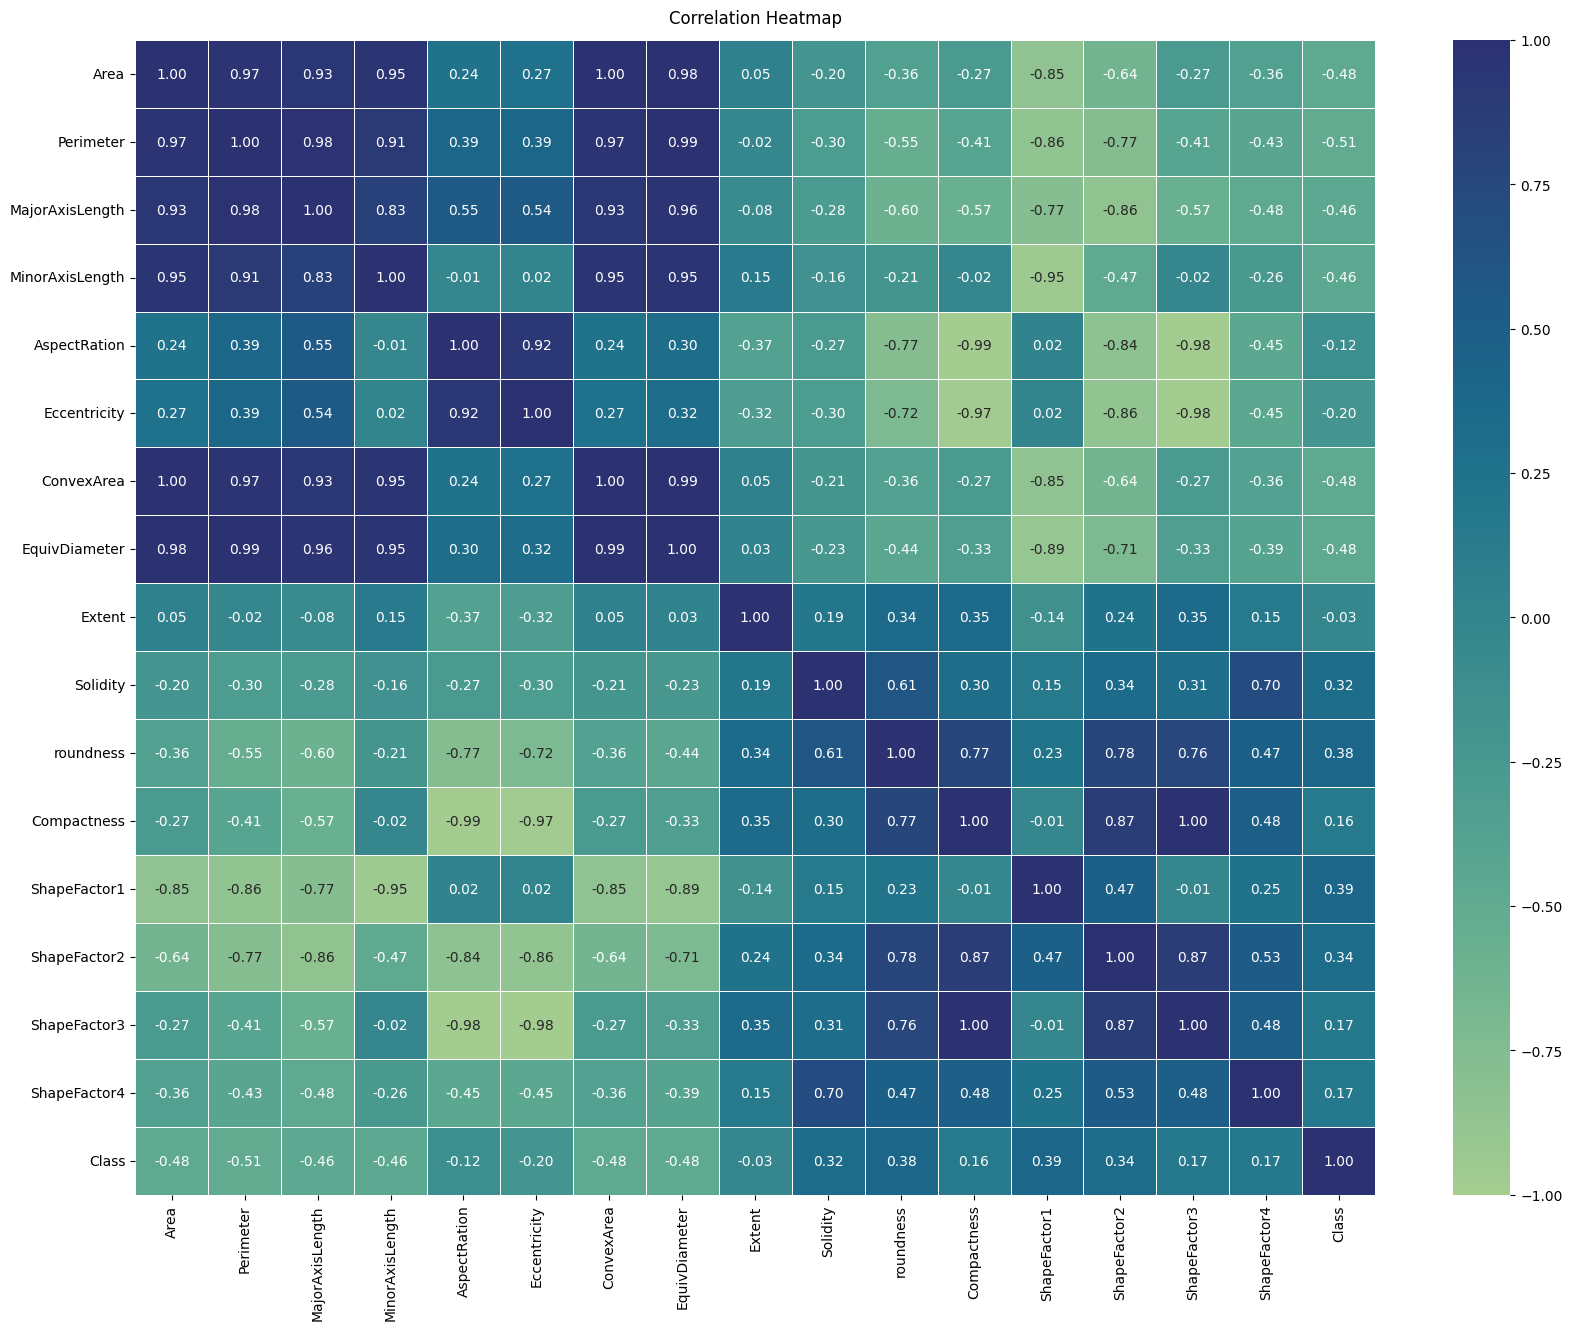

In [ ]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(dataf.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

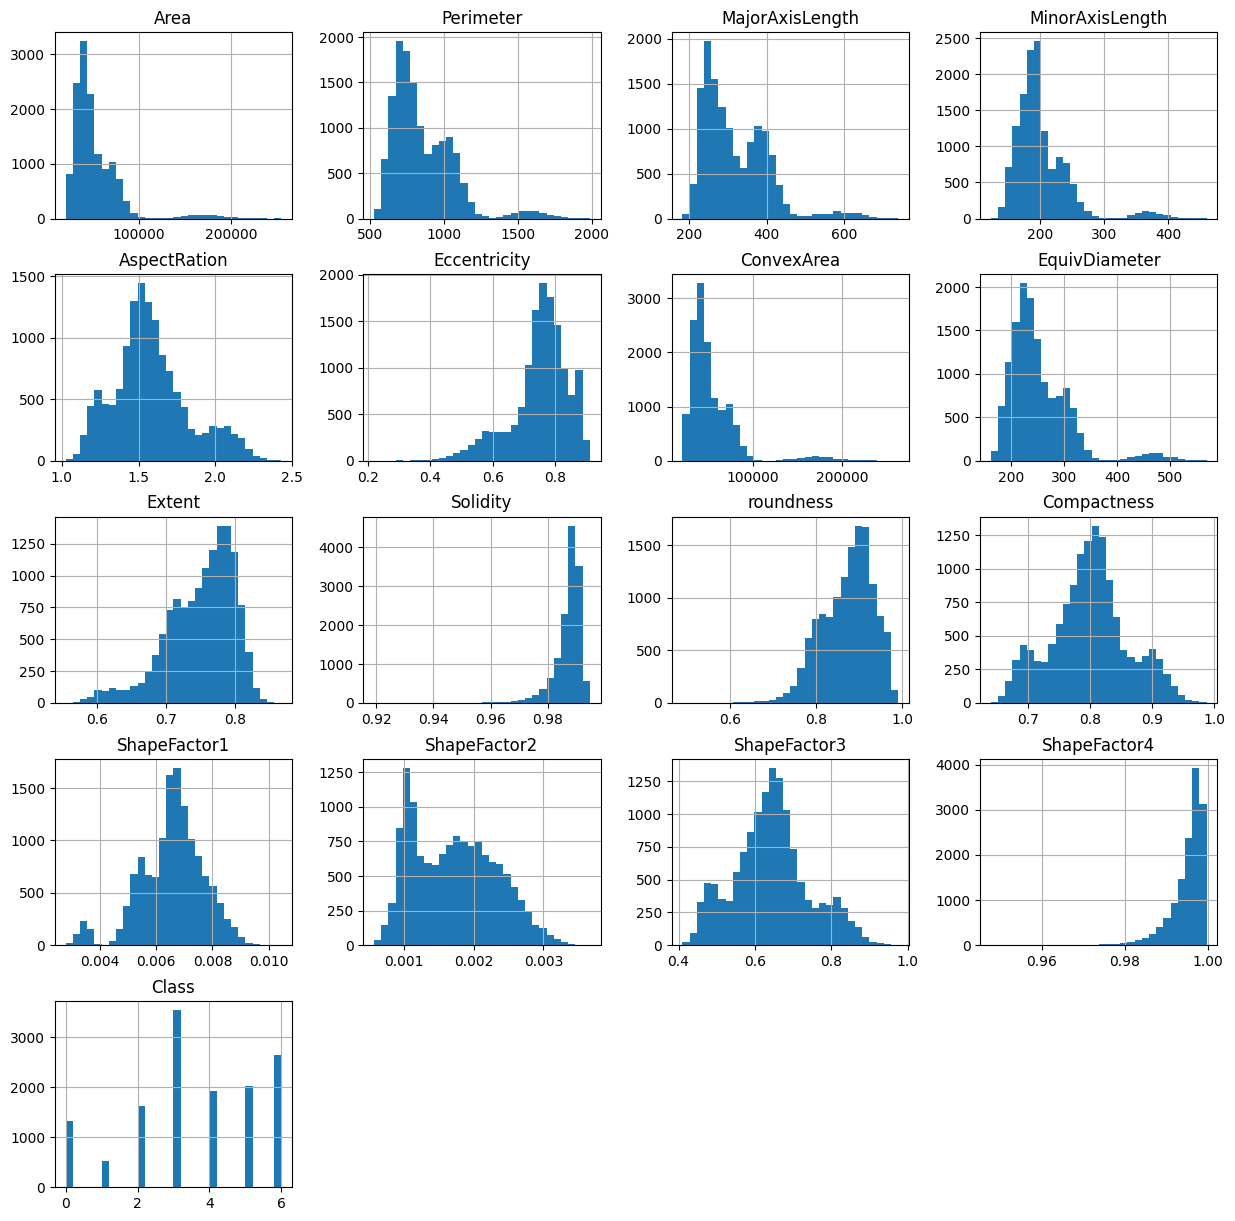

In [ ]:
dataf.hist(bins=30, figsize=(15,15))
plt.show()

In [ ]:
df=dataf.copy()
X = df.drop(columns='Class')
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=40)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7017629774730656


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.51      0.46      0.49       396
           1       1.00      0.99      1.00       146
           2       0.66      0.66      0.66       476
           3       0.79      0.89      0.84      1078
           4       0.67      0.63      0.65       590
           5       0.74      0.51      0.60       586
           6       0.64      0.73      0.68       812

    accuracy                           0.70      4084
   macro avg       0.72      0.70      0.70      4084
weighted avg       0.70      0.70      0.70      4084



In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9086679725759059


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       396
           1       1.00      0.96      0.98       146
           2       0.90      0.90      0.90       476
           3       0.89      0.94      0.92      1078
           4       0.95      0.94      0.94       590
           5       0.95      0.94      0.94       586
           6       0.87      0.83      0.85       812

    accuracy                           0.91      4084
   macro avg       0.92      0.91      0.92      4084
weighted avg       0.91      0.91      0.91      4084



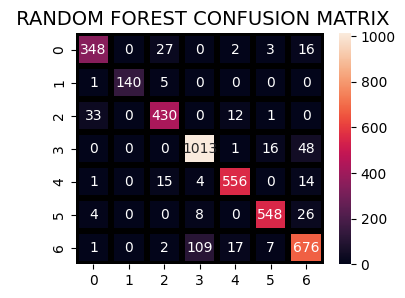

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.6900097943192948


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.48      0.55       396
           1       0.99      0.99      0.99       146
           2       0.70      0.80      0.74       476
           3       0.78      0.90      0.84      1078
           4       0.57      0.64      0.60       590
           5       0.73      0.48      0.58       586
           6       0.59      0.58      0.58       812

    accuracy                           0.69      4084
   macro avg       0.71      0.70      0.70      4084
weighted avg       0.69      0.69      0.68      4084



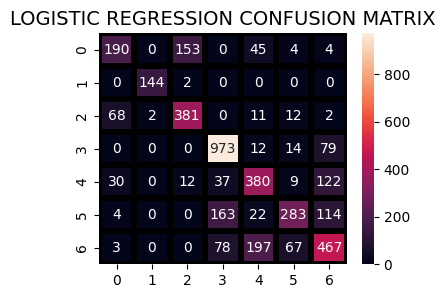

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)


Decision Tree accuracy is : 0.8907933398628796


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       396
           1       1.00      0.99      1.00       146
           2       0.92      0.89      0.90       476
           3       0.88      0.89      0.89      1078
           4       0.92      0.94      0.93       590
           5       0.92      0.92      0.92       586
           6       0.83      0.82      0.82       812

    accuracy                           0.89      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.89      0.89      0.89      4084



In [ ]:
# fit model no training data
model_XG = XGBClassifier()
model_XG.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# make predictions for test data
y_pred = model_XG.predict(X_test)
predictions = [round(value) for value in y_pred]


In [ ]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.92%


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       396
           1       1.00      0.96      0.98       146
           2       0.90      0.90      0.90       476
           3       0.89      0.94      0.92      1078
           4       0.95      0.94      0.94       590
           5       0.95      0.94      0.94       586
           6       0.87      0.83      0.85       812

    accuracy                           0.91      4084
   macro avg       0.92      0.91      0.92      4084
weighted avg       0.91      0.91      0.91      4084



In [ ]:
NB = GaussianNB()


In [ ]:
NB.fit(X_train,y_train)

GaussianNB()

In [ ]:
NB.score(X_train,y_train)

0.7677128162065708

In [ ]:
YNB_pre = NB.predict(X_test)


In [ ]:
print(classification_report(y_test,YNB_pre))


              precision    recall  f1-score   support

           0       0.62      0.43      0.51       396
           1       0.99      1.00      0.99       146
           2       0.65      0.79      0.72       476
           3       0.86      0.85      0.85      1078
           4       0.78      0.76      0.77       590
           5       0.67      0.68      0.68       586
           6       0.73      0.76      0.74       812

    accuracy                           0.75      4084
   macro avg       0.76      0.75      0.75      4084
weighted avg       0.75      0.75      0.75      4084



In [ ]:
scores_KNN = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_KNN)
print('Mean Accuracy:', scores_KNN.mean())


Cross-Validation Scores: [0.29882526 0.30639236 0.31447465 0.3328435  0.14548126 0.10213079
 0.09478325 0.07127112 0.05437179 0.15944159]
Mean Accuracy: 0.18800155582241182


In [ ]:
scores_rf = cross_val_score(model_rf, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_rf)
print('Mean Accuracy:', scores_rf.mean())


Cross-Validation Scores: [0.48311307 0.7516532  0.78912564 0.96693608 0.97207935 0.96546657
 0.96473181 0.72005878 0.69801616 0.44966936]
Mean Accuracy: 0.7760850027135182


In [ ]:
scores_lr = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_lr)
print('Mean Accuracy:', scores_lr.mean())


Cross-Validation Scores: [0.35903084 0.61498898 0.71418075 0.80014695 0.81925055 0.80822924
 0.81557678 0.80822924 0.66421749 0.35268185]
Mean Accuracy: 0.675653267388905


In [ ]:
scores_dt = cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_dt)
print('Mean Accuracy:', scores_dt.mean())


Cross-Validation Scores: [0.4845815  0.73695812 0.75459221 0.81116826 0.94562821 0.74283615
 0.71197649 0.70756796 0.67376929 0.35341661]
Mean Accuracy: 0.6922494796842177


In [ ]:
scores_NB = cross_val_score(NB, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_NB)
print('Mean Accuracy:', scores_NB.mean())

Cross-Validation Scores: [0.30396476 0.52681852 0.91623806 0.99338722 0.98897869 0.94562821
 0.92064658 0.87876561 0.58265981 0.18515797]
Mean Accuracy: 0.7242245433682799


In [ ]:
scores_xg = cross_val_score(model_XG, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_xg)
print('Mean Accuracy:', scores_xg.mean())



Cross-Validation Scores: [0.51395007 0.73989713 0.78912564 0.96326231 0.96840558 0.96399706
 0.80235121 0.77883909 0.70903747 0.36076414]
Mean Accuracy: 0.7589629720739588


In [ ]:
dataf.nunique()

Area               12011
Perimeter          13416
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [12]:
dataf['Area'] = pd.qcut( dataf['Area'],q=4,labels=['1', '2', '3', '4'])
dataf['Perimeter'] = pd.qcut( dataf['Perimeter'],q=4,labels=['1', '2', '3', '4'])
dataf['MajorAxisLength'] = pd.qcut( dataf['MajorAxisLength'],q=4,labels=['1', '2', '3', '4'])
dataf['MinorAxisLength'] = pd.qcut( dataf['MinorAxisLength'],q=4,labels=['1', '2', '3', '4'])
dataf['AspectRation'] = pd.qcut( dataf['AspectRation'],q=4,labels=['1', '2', '3', '4'])
dataf['Eccentricity'] = pd.qcut( dataf['Eccentricity'],q=4,labels=['1', '2', '3', '4'])
dataf['ConvexArea'] = pd.qcut( dataf['ConvexArea'],q=4,labels=['1', '2', '3', '4'])
dataf['EquivDiameter'] = pd.qcut( dataf['EquivDiameter'],q=4,labels=['1', '2', '3', '4'])
dataf['Extent'] = pd.qcut( dataf['Extent'],q=4,labels=['1', '2', '3', '4'])
dataf['Solidity'] = pd.qcut( dataf['Solidity'],q=4,labels=['1', '2', '3', '4'])
dataf['roundness'] = pd.qcut( dataf['roundness'],q=4,labels=['1', '2', '3', '4'])
dataf['Compactness'] = pd.qcut( dataf['Compactness'],q=4,labels=['1', '2', '3', '4'])
dataf['ShapeFactor1'] = pd.qcut( dataf['ShapeFactor1'],q=4,labels=['1', '2', '3', '4'])
dataf['ShapeFactor2'] = pd.qcut( dataf['ShapeFactor2'],q=4,labels=['1', '2', '3', '4'])
dataf['ShapeFactor3'] = pd.qcut( dataf['ShapeFactor3'],q=4,labels=['1', '2', '3', '4'])
dataf['ShapeFactor4'] = pd.qcut( dataf['ShapeFactor4'],q=4,labels=['1', '2', '3', '4'])


In [14]:

X = dataf.drop(columns='Class')
X.head()
X=pd.get_dummies(X)
X=X.astype('bool')
y = [x==3 for x in dataf['Class']]# taking the max class as true, which is Dermason
y=pd.Series(y)
X=X.iloc[9000:11000,:]
y=y.iloc[9000:11000]
y.value_counts()

False    1065
True      935
dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [16]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard-support")

In [17]:
bin_cls.predict(X_test.values)

In [18]:
print(bin_cls.predictions)
print(y_test)

[0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.

In [19]:
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions))

1.0
1.0


In [20]:
y_pred=bin_cls.predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       318
        True       1.00      1.00      1.00       282

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [21]:
def my_cross_val(model, X, y, n_splits=5):
    # Convert to numpy arrays if input is pandas DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    num_samples = len(X)
    fold_size = num_samples // n_splits
    scores = []

    for i in range(n_splits):
        # Define the indices for the current fold
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else num_samples

        # Create the training and validation sets
        val_idx = list(range(start, end))
        train_idx = [idx for idx in range(num_samples) if idx not in val_idx]

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        y_train=pd.Series(y_train)
        X_train=pd.DataFrame(X_train)
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard")  # Replace with your model's training method

        # Predict on validation set
        #X_test=pd.DataFrame(X_test)
        bin_cls.predict(X_test.values)

        # Calculate accuracy or any other metric of interest
        accuracy = accuracy_score(y_test, bin_cls.predictions)  # Replace with your own metric

        scores.append(accuracy)

    return scores


In [22]:
scores_bin1 = my_cross_val(bin_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin1)
print('Mean Accuracy:', pd.Series(scores_bin1).mean())

Cross-Validation Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean Accuracy: 1.0


In [23]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard-support")

In [24]:
bin_cls.predict(X_test.values)

In [25]:
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions.astype(bool)))

1.0
1.0


In [26]:
y_pred=bin_cls.predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       318
        True       1.00      1.00      1.00       282

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [27]:
def my_cross_val(model, X, y, n_splits=5):
    # Convert to numpy arrays if input is pandas DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    num_samples = len(X)
    fold_size = num_samples // n_splits
    scores = []

    for i in range(n_splits):
        # Define the indices for the current fold
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else num_samples

        # Create the training and validation sets
        val_idx = list(range(start, end))
        train_idx = [idx for idx in range(num_samples) if idx not in val_idx]

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        y_train=pd.Series(y_train)
        X_train=pd.DataFrame(X_train)
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard")  # Replace with your model's training method

        # Predict on validation set
        #X_test=pd.DataFrame(X_test)
        bin_cls.predict(X_test.values)

        # Calculate accuracy or any other metric of interest
        accuracy = accuracy_score(y_test, bin_cls.predictions)  # Replace with your own metric

        scores.append(accuracy)

    return scores


In [28]:
scores_bin2 = my_cross_val(bin_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin2)
print('Mean Accuracy:', pd.Series(scores_bin2).mean())

Cross-Validation Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean Accuracy: 1.0


In [29]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="ratio-support ")

In [30]:
bin_cls.predict(X_test.values)

In [31]:
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions.astype(bool)))

0.53
0.0


In [32]:
y_pred=bin_cls.predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.53      1.00      0.69       318
        True       0.00      0.00      0.00       282

    accuracy                           0.53       600
   macro avg       0.27      0.50      0.35       600
weighted avg       0.28      0.53      0.37       600



In [33]:
scores_bin3 = my_cross_val(bin_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin3)
print('Mean Accuracy:', pd.Series(scores_bin3).mean())

Cross-Validation Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean Accuracy: 1.0


In [13]:
X = dataf.drop(columns='Class')
#X.head()
#X=pd.get_dummies(X)
#X=X.astype('bool')
y = [x==3 for x in dataf['Class']]# taking the max class as true, which is Dermason
y=pd.Series(y)
X=X.iloc[9500:10500,:]
y=y.iloc[9500:10500]
y.value_counts()

False    565
True     435
dtype: int64

In [17]:
pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy())

In [18]:
pat_cls.predict(X_test.values)

In [19]:
print(accuracy_score(y_test, pat_cls.predictions))
print(f1_score(y_test, pat_cls.predictions.astype('bool')))

0.8166666666666667
0.9042904290429044


In [20]:
y_pred=pat_cls.predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       1.00      0.82      0.90       163
         1.0       1.00      0.81      0.90       137

    accuracy                           0.82       300
   macro avg       0.67      0.54      0.60       300
weighted avg       1.00      0.82      0.90       300



In [21]:
def my_cross_val(model, X, y, n_splits=5):
    # Convert to numpy arrays if input is pandas DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    num_samples = len(X)
    fold_size = num_samples // n_splits
    scores = []

    for i in range(n_splits):
        # Define the indices for the current fold
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else num_samples

        # Create the training and validation sets
        val_idx = list(range(start, end))
        train_idx = [idx for idx in range(num_samples) if idx not in val_idx]

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        y_train=pd.Series(y_train)
        X_train=pd.DataFrame(X_train)
        pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy())  # Replace with your model's training method

        # Predict on validation set
        #X_test=pd.DataFrame(X_test)
        pat_cls.predict(X_test.values)

        # Calculate accuracy or any other metric of interest
        accuracy = accuracy_score(y_test, pat_cls.predictions)  # Replace with your own metric

        scores.append(accuracy)

    return scores


In [22]:

scores_bin4 = my_cross_val(pat_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin4)
print('Mean Accuracy:', pd.Series(scores_bin4).mean())

Cross-Validation Scores: [0.9066666666666666, 0.99, 1.0, 1.0, 1.0, 1.0, 0.9966666666666667, 1.0, 0.9966666666666667, 0.9]
Mean Accuracy: 0.9789999999999999
